In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('Dataset.csv')
print(df)
# Handle missing values
df = df.fillna({'Cuisines': 'Unknown'})

# Create and fit the encoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[['Cuisines']])

# Get encoded feature names and create DataFrame
feature_names = encoder.get_feature_names_out(['Cuisines'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Combine with original DataFrame
df = pd.concat([df.drop(['Cuisines'], axis=1), encoded_df], axis=1)


      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

Accuracy: 0.35
Precision: 0.38
Recall: 0.35

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00        61
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          20       1.00      0.96      0.98        70
          21       1.00      0.31      0.47        36
          23       0.00      0.00      0.00         9
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00        19
          27 

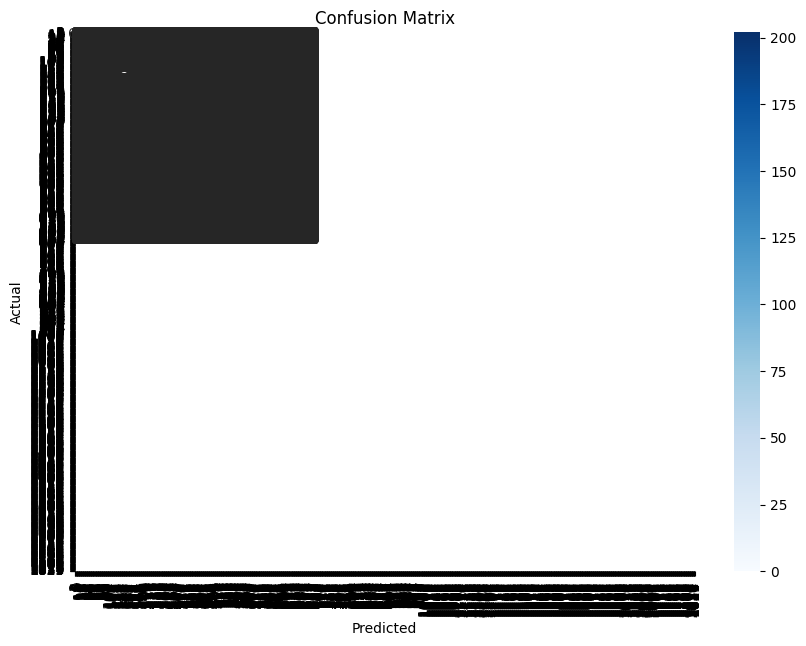

C:\Users\Yegneswar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Yegneswar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Yegneswar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Yegneswar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Yegneswar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Yegneswar\anaconda3\Lib\site-packages\sklearn\metrics\_r

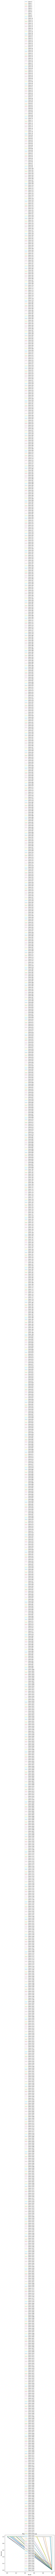

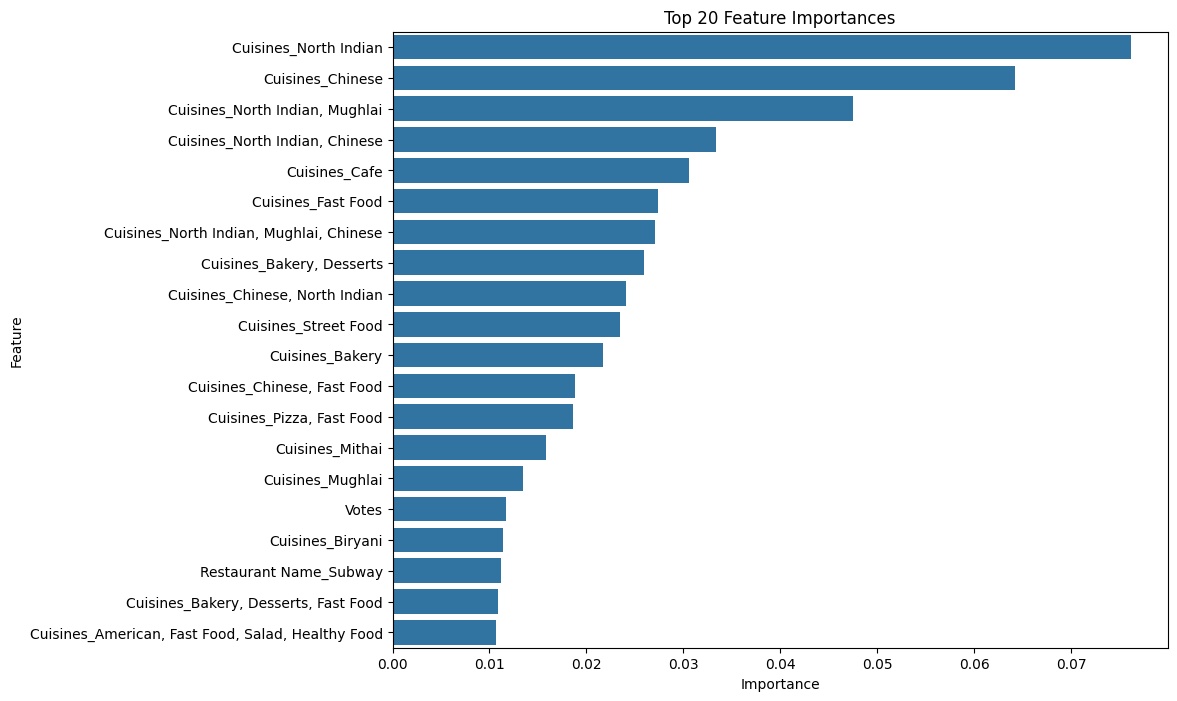

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Dataset.csv')

# Handle missing values for all categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('Unknown')

# Identify categorical columns (all object type columns)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_cols])

# Get encoded feature names and create DataFrame
feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Combine with original DataFrame (drop original categorical columns)
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Check for any remaining non-numeric columns and drop them if necessary
non_numeric = df.select_dtypes(exclude=['number']).columns
if len(non_numeric) > 0:
    df = df.drop(non_numeric, axis=1)

# Create target variable using the original 'Cuisines' column (before encoding)
df_temp = pd.read_csv('Dataset.csv')
df_temp['Cuisines'] = df_temp['Cuisines'].fillna('Unknown')
target_labels = df_temp['Cuisines'].factorize()[0]  # Simple label encoding for demonstration
df['cuisine_label'] = target_labels

# Define features and target
X = df.drop('cuisine_label', axis=1)
y = df['cuisine_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision-Recall Curve (for multi-class, one-vs-rest approach)
plt.figure(figsize=(8, 6))
for i in range(len(rf_model.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred == i)
    plt.plot(recall, precision, label=f'Class {i}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision-Recall Curve (for multi-class, one-vs-rest approach)
plt.figure(figsize=(8, 6))
for i in range(len(rf_model.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred == i)
    plt.plot(recall, precision, label=f'Class {i}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Feature Importance Plot
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

Accuracy: 0.35
Precision: 0.38
Recall: 0.35

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00        61
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          20       1.00      0.96      0.98        70
          21       1.00      0.31      0.47        36
          23       0.00      0.00      0.00         9
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00        19
          27 